In [1]:
# imports 
%matplotlib inline
from IPython.display import YouTubeVideo
from IPython.display import Math
import sklearn
import numpy as np
import numpy.random as rng
import matplotlib
import matplotlib.pyplot as plt
#Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
sns.set()

In [2]:
# Set up small diabetes training data 
rng.seed(42)
diabetes_data = datasets.load_diabetes()
N = len(diabetes_data.target)
i = rng.randint(0,N-1,15)
X_train = diabetes_data.data[i,np.newaxis,2]
y_train = diabetes_data.target[i]

itest = np.setdiff1d( rng.randint(0,N-1,103), i)
Xtest = diabetes_data.data[itest,np.newaxis,2]
ytest = diabetes_data.target[itest]

In [3]:
# Download the newsgroups data
data_newsgroups = fetch_20newsgroups();
data_newsgroups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# Settings
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams.update({'lines.markersize': 12})
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = 'gray'
matplotlib.rcParams['grid.linewidth'] = 0.5
# matplotlib.rcParams

# Janelia Machine Learning Course
## Lecture 1
**Tuesday 10 Sept 2018**  
**John Bogovic**

### Intro, preliminaries, and simple ML approaches
* Review:
  * Linear algebra
  * Probability theory


* Classes of ML problems / jargon / "big ideas"
* Example: Linear regression
  * as curve fitting
  * as Parameter estimation

### Survey

# What is machine learning?



### Computer programming
* Inputs -> **Program** -> Outputs

### Supervised Machine learning
* (Inputs, Outputs) -> **S-ML** -> Program
    * Inputs -> Program -> Outputs


* Classification
* Regression

### Unsupervised Machine learning
* Inputs -> **U-ML** -> Program
    * Inputs -> Program -> "pattern"/"summary"


* Clustering
* Probability Density estimation

## Regression
* Predict continuous variable(s)


## Classification
* Predict discrete variable(s)

# An example: supervised regression
* Try to predict Diabetes progression from measurements of blood pressure

### The process
1. Collect data
2. Look at it


* **"Data"**
  * The set of inputs and outputs

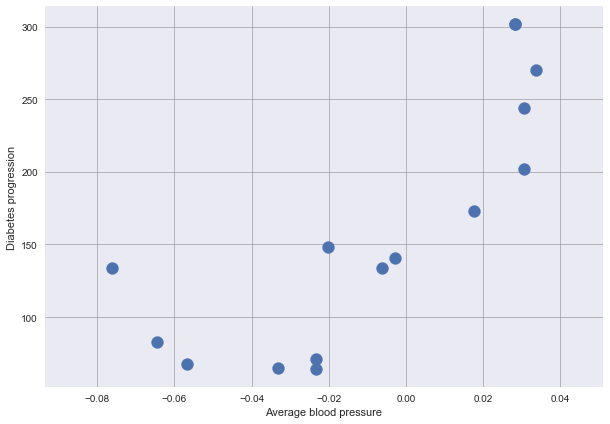

In [5]:
plt.scatter( X_train, y_train )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

* **"Normalization"**
  * Preprocessing the data, ensuring your inputs are at a similar scale

### Why is blood pressure negative?

### The process
1. Collect data
2. Look at the data
3. Choose a model
4. Fit a model 
   * *"Parameter optimization"*
   * *"Training"*
   * *"Fitting"*


* **"Model"** 
  * the kind of program your ML system will produce
  * The mathematical equation with inputs on one side and outputs on the other
  * one way to tell the ML system properties you believe the data have


* **"Parameters"**
  * "knobs" (numbers) that determine how the model behaves
  * or things you can change about the model

## A silly (?) model

* $y$ : diabetes progression
* $x$ : blood pressure measurement

\begin{equation*}
\begin{array}
\mathrm{if} \, x < 0.1 :& y=100 \\
\mathrm{else} :& y=\exp(2x)
\end{array}
\end{equation*}

## A simple model (linear)
* $y$ : diabetes progression
* $x$ : blood pressure measurement

\begin{equation*}
y = ax + b
\end{equation*}

* Parameters: $a$, $b$


* **"Cost function"**
    * How to measure how well a model (with particular parameters) fits your data

### Sum of squared differences (SSD)

![Image](SSD.png)


* $C(a,b) = \sum_i ( y_i - (a x_i + b) )^2$

Sometimes, the true output is written as $y$ and the estimate as $\hat{y}$ *"y-hat"*
* $C = \sum_i ( y_i - \hat{y_i} )^2$

In [6]:
# A linear model
model = LinearRegression()

# Train the model using the training sets
# i.e., find parameters that make the model best fit the data
model.fit(X_train, y_train)

# What are the parameters we found to be best?
print('Optimal parameters: ')
print('slope: {:.3f}\nintercept: {:.3f}'.format(model.coef_[0], model.intercept_ ))

Optimal parameters: 
slope: 1845.425
intercept: 177.089


### The process
1. Collect data
2. Look at the data
3. Choose a model
4. Fit a model
5. Use the model to generate a prediction
    * *"Inference"*

In [7]:
# Run the prediction
y_pred = model.predict(X_train)

In [8]:
model.score( X_train, y_train )

0.6386237233762975

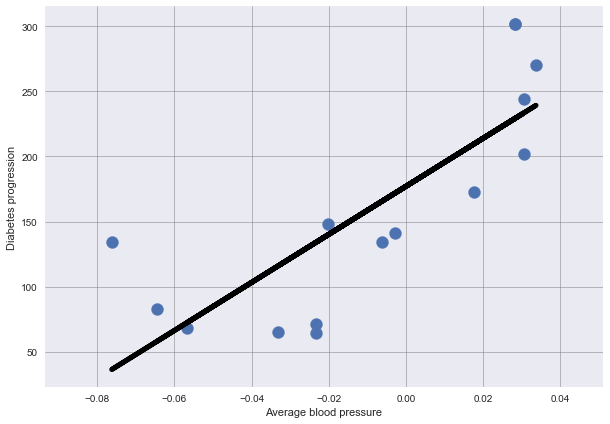

In [9]:
plt.scatter( X_train, y_train )
plt.plot( X_train, y_pred, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

Lets go under the hood: **How do we optimize this?**

# Linear Algebra review

## Vectors
* A list of numbers
* An arrow with its base at the origin

\begin{equation*}
\mathbf{x} = 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
\end{equation*}

* Transpose

\begin{equation*}
\mathbf{x}^T=
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\end{equation*}

### operations
* Multiply with a scalar: $s\,\mathbf{v}$
    * result is a vector


* Add to another vector $\mathbf{z} = \mathbf{x} + \mathbf{y}$ 
    * result is a vector
    
    
* Multiply with a vector $\theta = \mathbf{x}^T \, \mathbf{y}$
    * result is a scalar
    * "Inner Product"
    * "Dot Product"
    * "Projection"

### Dot product

\begin{align}
\mathbf{x}^T \, \mathbf{y} &=  x_1 \, y_1 + x_2 \, y_2 + x_3 \, y_3 \\
\mathbf{x}^T \, \mathbf{y} &= \sum_i x_i \, y_i
\end{align}

\begin{equation*} 
\begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}
\begin{bmatrix}
y_1 \\ y_2 \\ y_3
\end{bmatrix}
\end{equation*}


## Matrix / Matrices
* A 2d array of numbers
    * N rows
    * M columns
    * $A_{N \times M}$

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2} & a_{1,3} \\
a_{2,1} & a_{2,2} & a_{2,3} \\
a_{3,1} & a_{3,2} & a_{3,3} \\
\end{bmatrix}
\end{equation*}

* A linear transformation
  * A function whose inputs are M-vectors and whose outputs are N-vectors

### operations
* Multiply with a scalar: $\, s\,\mathbf{M}$
    * result is a matrix


* Multiply with a vector: $\, \mathbf{z} = \mathbf{A}\,\mathbf{v}$ 
    * result is a vector


* Multiply with a matrix: $\, \mathbf{C} = \mathbf{A} \, \mathbf{B}$
    * result is a matrix

### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Don't think of it this way (imo) :

\begin{equation*}
y_{i} = \sum_j a_{i,j} \, x_{j}
\end{equation*}



### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Think of it this way:
* $\mathbf{A}$ as a "list" of rows:

\begin{equation*}
\mathbf{A} = \begin{bmatrix}
-- & \mathbf{a}^T_{1} & -- \\
-- & \mathbf{a}^T_{2} & -- \\
-- & \mathbf{a}^T_{3} & -- \\
\end{bmatrix}
\end{equation*}

* Entries of $\mathbf{y}$ are each a dot product:

\begin{equation*}
\mathbf{y} = \begin{bmatrix}
\mathbf{a}^T_{1} \, \mathbf{x} \\
\mathbf{a}^T_{2} \, \mathbf{x} \\
\mathbf{a}^T_{3} \, \mathbf{x} \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
y_{i} = \mathbf{a}^T_{i} \, \mathbf{x}
\end{equation*}

### Matrix - vector multiplication
\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

* Or this way: As a linear combination of the columns of $\mathbf{A}$


\begin{equation*}
\begin{bmatrix}
 | & | & | \\
 \boldsymbol{\alpha}_1 &  \boldsymbol{\alpha}_2 &  \boldsymbol{\alpha}_3 \\
 | & | & | \\
\end{bmatrix}
\mathbf{x} =  x_1 \, \boldsymbol{\alpha}_1 + x_2 \, \boldsymbol{\alpha}_2 + x_3 \, \boldsymbol{\alpha}_3 = \mathbf{y}
\end{equation*}

* Which means that:

\begin{equation*}
\begin{bmatrix}
 | & | & | \\
 \boldsymbol{\alpha}_1 &  \boldsymbol{\alpha}_2 &  \boldsymbol{\alpha}_3 \\
 | & | & | \\
\end{bmatrix}
\mathbf{\hat{i}} =  \boldsymbol{\alpha}_1
\end{equation*}

where $\mathbf{\hat{i}}^T = [1 \,\, 0 \,\, 0 ]$

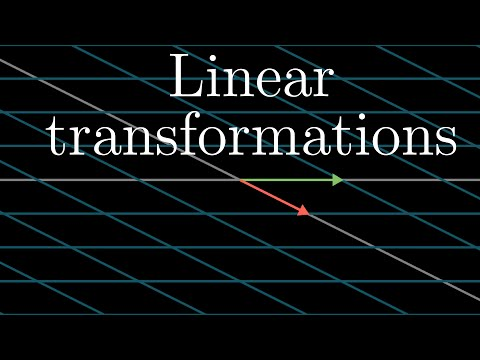

In [10]:
# Video for linear transformations
YouTubeVideo('kYB8IZa5AuE', start=228)

### Matrix - vector multiplication
* As a linear system of equations

\begin{equation*}
\begin{bmatrix}
a_{1,1} & a_{1,2} \\
a_{2,1} & a_{2,2} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\ y_2 \\
\end{bmatrix}
\end{equation*}

* Equivalent to:

\begin{align}
a_{1,1} \, x_1  + a_{1,2} \, x_2  &= y_1 \\
a_{2,1} \, x_1  + a_{2,2} \, x_2  &= y_2
\end{align}

* When is this solvable?

### Matrix inverse
\begin{equation*}
\mathbf{A} \, \mathbf{A}^{-1} = \mathbf{I}
\end{equation*}

where $\mathbf{I}$ is the identity matrix:

\begin{equation*}
\mathbf{I} = 
\begin{bmatrix}
1 & 0 \\ 
0 & 1 \\ 
\end{bmatrix}
\end{equation*}

#### Exercise
If:

\begin{equation*}
\mathbf{A} \, \mathbf{A}^{-1} = \mathbf{I}
\end{equation*}

Does:

\begin{equation*}
\mathbf{A}^{-1} \, \mathbf{A} = \mathbf{I}
\end{equation*}

### Matrix inverse to solve a linear system

If:

\begin{equation*}
\mathbf{A} \, \mathbf{x} = \mathbf{y}
\end{equation*}

then:

\begin{equation*}
\mathbf{x} = \mathbf{A}^{-1} \, \mathbf{y}
\end{equation*}

#### Don't do this in your code - it's slow!

* What is the solution?

\begin{equation*}
\begin{bmatrix}
1 & -2 \\
-3 & 6 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\
\end{bmatrix} = 
\begin{bmatrix}
1 \\ 2 \\
\end{bmatrix}
\end{equation*}


* Linear independence of vectors
* Rank of a matrix

### Eigenvalues and eigenvectors
$\mathbf{z}$ is an *eigenvector* of $\mathbf{A}$ and $\lambda$ is its *associated eigenvalue* if:

\begin{equation*}
\mathbf{A}\,\mathbf{z} = \lambda \, \mathbf{z}
\end{equation*}

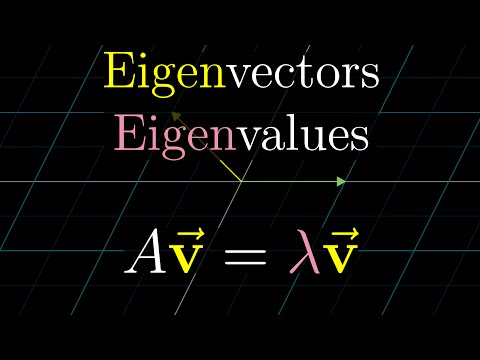

In [11]:
# Video for eigenvalues and eigenvectors
YouTubeVideo('PFDu9oVAE-g', start=81)

### Eigenvalues and eigenvectors
$\mathbf{z}$ is an *eigenvector* of $\mathbf{A}$ and $\lambda$ is its *associated eigenvalue* if:

\begin{equation*}
\mathbf{A}\,\mathbf{z} = \lambda \, \mathbf{z}
\end{equation*}

\begin{equation*}
(\mathbf{A} - \lambda\mathbf{I})\,\mathbf{z} = \mathbf{0}
\end{equation*}

\begin{equation*}
\mathrm{det}(\mathbf{A} - \lambda\mathbf{I}) = \mathbf{0}
\end{equation*}

where det() is the **determinant** of a matrix

* Does every matrix have eigenvectors?

\begin{equation*}
\begin{bmatrix}
0 & -1 \\
1 & 0 \\
\end{bmatrix}
\end{equation*}

* What are it's eigenvalues?
    * Try it, solve:
    
\begin{align}
\lambda \, x - y &= 0 \\
x + \lambda \, y &= 0
\end{align}

#### Eigenvalue / eigenvector decomposition
* Not always possible, but when $\mathbf{A}$ is *"diagonalizable"*:

\begin{equation*}
\mathbf{A} = \mathbf{Q} \, \mathbf{\Lambda} \, \mathbf{Q}^{-1}
\end{equation*}

where if $\mathbf{z}_i$ are eigenvectors, and $\lambda_i$ are eigenvalues, then:

\begin{equation*}
\mathbf{Q} = 
\begin{bmatrix}
 | & | \\
 \mathbf{z}_1 &  \mathbf{z}_2 \\
 | & | \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
\mathbf{\Lambda} = 
\begin{bmatrix}
 \lambda_1 & 0 \\
 0 & \lambda_2 \\
\end{bmatrix}
\end{equation*}

### Non-square matrices
* $\mathbf{A}_{4 \times 2}$

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2}  \\
a_{2,1} & a_{2,2}  \\
a_{3,1} & a_{3,2}  \\
a_{4,1} & a_{4,2}  \\
\end{bmatrix}
\end{equation*}

* What size are its "inputs"?
* What size are its "outputs"?


### "Solving" this linear system?

\begin{align}
1 \, m  &= 2 \\
1 \, m  &= 3 \\
2 \, m  &= 4 \\
2 \, m  &= 5 \\
\end{align}

## Minimize the sum of errors (back to SSD)

* $C= \sum_i ( y_i - a_i \, m )^2$

### "Solvable" with a special matrix
* The "pseudo-inverse": $\mathbf{A}^{\dagger}$

\begin{equation*}
\mathbf{A}_{4 \times 2} \, \mathbf{x}_{2 \times 1} = \mathbf{y}_{4 \times 1}
\end{equation*}

\begin{equation*}
\mathbf{x}_{2 \times 1} = \mathbf{A}^{\dagger}_{2 \times 4} \,  \mathbf{y}_{4 \times 1}
\end{equation*}


\begin{align}
a_{1,1} \, x_1  + a_{1,2} \, x_2  &= y_1 \\
a_{2,1} \, x_1  + a_{2,2} \, x_2  &= y_2 \\
a_{3,1} \, x_1  + a_{3,2} \, x_2  &= y_3 \\
a_{4,1} \, x_1  + a_{4,2} \, x_2  &= y_4 \\
\end{align}

\begin{equation*}
\mathbf{A} = 
\begin{bmatrix}
a_{1,1} & a_{1,2}  \\
a_{2,1} & a_{2,2}  \\
a_{3,1} & a_{3,2}  \\
a_{4,1} & a_{4,2}  \\
\end{bmatrix}
\end{equation*}

### Singular value decomposition

* If the SVD of $\mathbf{A}$ is:

\begin{equation*}
\mathbf{A} = \mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^{*}
\end{equation*}

* Then $\mathbf{A}^{\dagger}$ is:

\begin{equation*}
\mathbf{A}^{\dagger} = \mathbf{V} \, \mathbf{\Sigma}^{\dagger} \, \mathbf{U}^{*}
\end{equation*}

* where:

\begin{equation*}
\mathbf{U} = 
\begin{bmatrix}
 | & | & | &| \\
 \mathbf{u}_1 &  \mathbf{u}_2 &  \mathbf{u}_3 &  \mathbf{u}_4 \\
 | & | & | &| \\
\end{bmatrix}_{4 \times 4}
\end{equation*}

\begin{equation*}
\mathbf{\Sigma} = 
\begin{bmatrix}
\sigma_1 & 0 \\
0 & \sigma_2 \\
0 & 0 \\
0 & 0 \\
\end{bmatrix}_{4 \times 2}
\end{equation*}

\begin{equation*}
\mathbf{V} = 
\begin{bmatrix}
 | & | \\
 \mathbf{v}_1 &  \mathbf{v}_2 \\
 | & | \\
\end{bmatrix}_{2 \times 2}
\end{equation*}

* where $\mathbf{A}^{*} is the conjugate transpose of $\mathbf{A}$ (a transpose with complex-valued matrices)

\begin{equation*}
\mathbf{\Sigma}^{\dagger} = 
\begin{bmatrix}
\frac{1}{\sigma_1} & 0 & 0 & 0\\
0 & \frac{1}{\sigma_2} & 0 & 0 \\
\end{bmatrix}_{2 \times 4 }
\end{equation*}

![Image](512px-Singular-Value-Decomposition.svg.png)
From [wikipedia (Georg-Johann)](https://commons.wikimedia.org/wiki/File:Singular-Value-Decomposition.svg)

#### Don't compute the SVD in your code for solving a general linear system - it's slow!

# Back to linear regression

* Let's set up the problem
* We have:

\begin{equation*}
a \, x_1  + b  = y_1 \\
a \, x_2  + b  = y_2 \\
a \, x_3  + b  = y_3 \\
a \, x_4  + b  = y_4 \\
\end{equation*}

* and want to find the minimum-least-squares solution

\begin{equation*}
\mathbf{X} \, \mathbf{\theta} = \mathbf{y}
\end{equation*}

\begin{equation*}
\begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \\
\end{bmatrix}
\begin{bmatrix}
a \\ b
\end{bmatrix} = 
\begin{bmatrix}
y_1 \\ y_2 \\ y_3 \\ y_4 \\
\end{bmatrix}
\end{equation*}

In [12]:
X1 = np.concatenate( (X_train, np.ones( (len(X_train),1) )), axis=1 ) # Check that this is correct in lab
theta,resid,rank,s = np.linalg.lstsq( X1, y_train, rcond=None) # Note this is not explicitly computing the SVD
y_linsolv_pred = np.matmul( X1, theta ); # Compare this to the previous output
print( 'Optimal parameters: ' )
print( 'slope: {:.3f}\nintercept: {:.3f}'.format(  theta[0], theta[1] ))

Optimal parameters: 
slope: 1845.425
intercept: 177.089


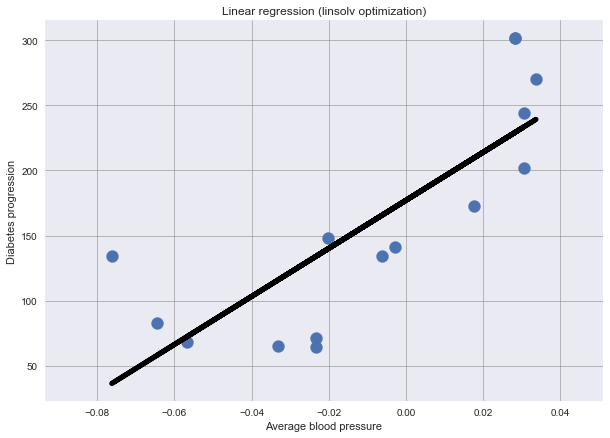

In [13]:
plt.scatter( X_train, y_train )
plt.plot( X_train, y_linsolv_pred, color='black', linewidth=5 )
plt.title("Linear regression (linsolv optimization)")
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

## "Gradient descent"
* A more general optimization method (Two weeks)

### Exercises 
1. Run this notebook
2. Read [this website about the diabetes dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
3. and [this website sklearn's Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
4. Add another feature from the dataset, and solve using sklearn's LinearRegression
5. Set up the matrix equation for linear regression with two features
6. Solve the linear system and make sure the results are the same as those you got with sklearn

In [14]:
# Set up small diabetes training data 
rng.seed(42)
diabetes_data = datasets.load_diabetes()
N = len(diabetes_data.target)
i = rng.randint(0,N-1,15)
X_train_ = diabetes_data.data[i,:2]
y_train_ = diabetes_data.target[i]
itest = np.setdiff1d( rng.randint(0,N-1,103), i)
Xtest_ = diabetes_data.data[itest,:2]
ytest_ = diabetes_data.target[itest]

In [15]:
X1 = np.concatenate( (X_train_, np.ones( (len(X_train_),1) )), axis=1 )
'''
rcond: Cut-off ratio for small singular values of X. 
For the purposes of rank determination, singular values are 
treated as zero if they are smaller than rcond times the largest 
singular value of X.
'''
# rcond=-1: machine precision
# rcond=None: machine precision x max(M, N)
theta,resid,rank,s = np.linalg.lstsq( X1, y_train_,rcond=None)
y_linsolv_pred = np.matmul( X1, theta ); # Compare this to the previous output
print( 'Optimal parameters: ' )
print( 'slope: {:.3f}, {:.3f}\nintercept: {:.3f}'.format(  theta[0], theta[1], theta[2] ))

Optimal parameters: 
slope: -531.824, 216.592
intercept: 159.068


In [16]:
model_=LinearRegression()
model_.fit(X_train_, y_train_)
# What are the parameters we found to be best?
print('Optimal parameters: ')
print('slope: {:.3f}, {:.3f}\nintercept: {:.3f}'.format(model_.coef_[0], model_.coef_[1], model_.intercept_ ))

Optimal parameters: 
slope: -531.824, 216.592
intercept: 159.068


* **"Features"**
  * Things you observe / data you collect to include as inputs to your program to help make a prediction.

# Probability review

## Axioms (rules)
* Random variable take values in a sample space $X \in \Omega$
* Probability of an event $P(X=x) \ge 0$
* $\sum_{x\in\Omega} P(x) = 1$
* if $x_1$, $x_2$ disjoint $P( x_1 \, \mathrm{or} \, x_2) = P(x_1) + P(x_2)$ 

## Probability distribution function (PDF)
(Continuous variables)
* $\int_a^b p(x)$ : probability that x takes value between $a$ and $b$

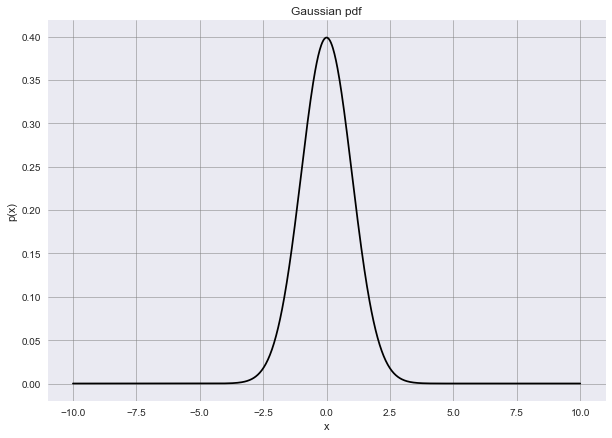

In [17]:
from scipy.stats import norm

gausspdf = norm(0, 1)
x = np.linspace(-10, 10, 1000)

plt.plot(x, gausspdf.pdf(x) , c='black',
    label=r'$\mu=%i,\ \sigma=%.1f$' % (0, 1));
plt.xlabel("x");
plt.ylabel("p(x)");
plt.title('Gaussian pdf');

### Gaussian ("Normal") pdf
\begin{equation*}
\mathcal{N}(x \, ; \mu, \, \sigma) = \frac{1}{ \sqrt {2\,\pi\,\sigma^2}}\exp{ - \frac{( x - \mu )^2}{2 \sigma^2}}
\end{equation*}

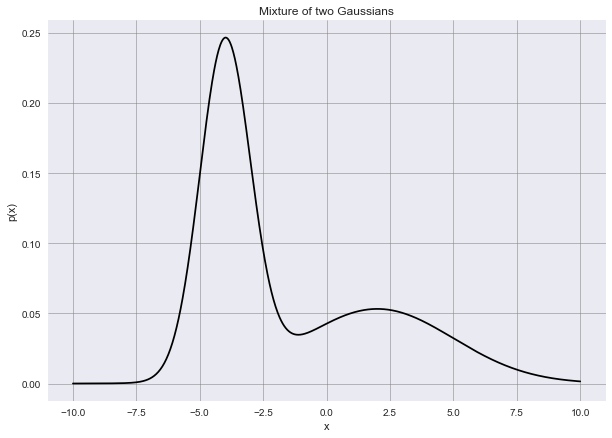

In [18]:
from scipy.stats import norm

dist1 = norm(-4, 1)
dist2 = norm(2, 3)
x = np.linspace(-10, 10, 1000)

plt.plot(x, 0.6*dist1.pdf(x) + 0.4*dist2.pdf(x), c='black');
plt.xlabel("x");
plt.ylabel("p(x)");
plt.title("Mixture of two Gaussians");

## Expectation
"Mean", "Average"
* $E(X) = \sum_{\Omega} x \, p(x)$
* $E(f(X)) = \sum_{\Omega} f(x) \, p(x)$

## Joint probability distribution
* $P(X=x,Y=y) = p(x,y)$

## Independence
* Two random variables are "independent" iff:

\begin{equation*}
P(X,Y) = P(X)P(Y)
\end{equation*}

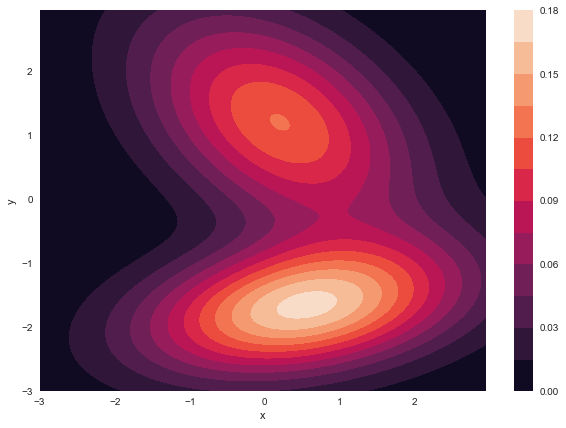

In [19]:
from scipy.stats import multivariate_normal
x, y = np.mgrid[-3:3:0.05, -3:3:0.05]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -1.7], [[2.0, 0.3], [0.3, 0.5]])
rv2 = multivariate_normal([0.2, 1.2], [[1.5, -1.0],[-0.6,1.4]])
jointPdf = rv.pdf(pos) + rv2.pdf(pos)

plt.contourf(x, y, jointPdf, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar();

## Conditional distribution
* $p(y \,| \, x)$ : "probability of y given x"

### Related to the joint distribution:

\begin{equation*}
p(y \,| \, x) = \frac{ p(x, y) }{ p(x) }
\end{equation*}

\begin{equation*}
p(y \,| \, x) p(x) = p(x, y)
\end{equation*}

xvalue 2.5


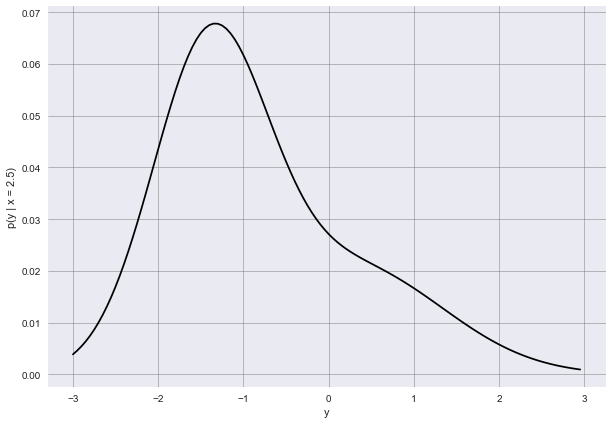

In [20]:
i=110
xvalue = x[i,0]
print('xvalue {}'.format(xvalue))

plt.plot(y[i,:], jointPdf[i,:], c='black' );
plt.xlabel("y");
plt.ylabel('p(y | x = {})'.format(xvalue));

xvalue -1.0


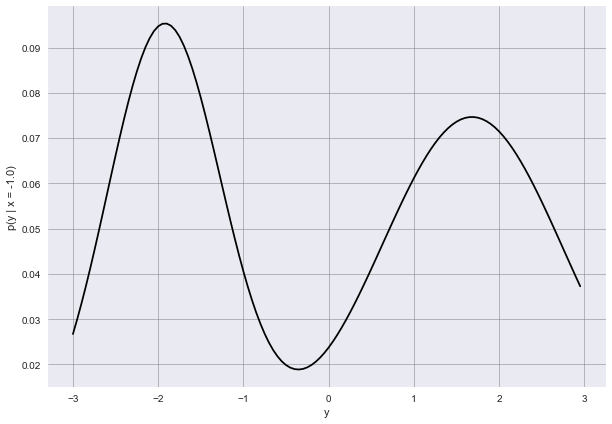

In [21]:
i = 40
xvalue = x[i,0]
print('xvalue {}'.format(xvalue))

plt.plot(y[i,:], jointPdf[i,:], c='black' );
plt.xlabel("y");
plt.ylabel('p(y | x = {})'.format(xvalue));

yvalue 2.0


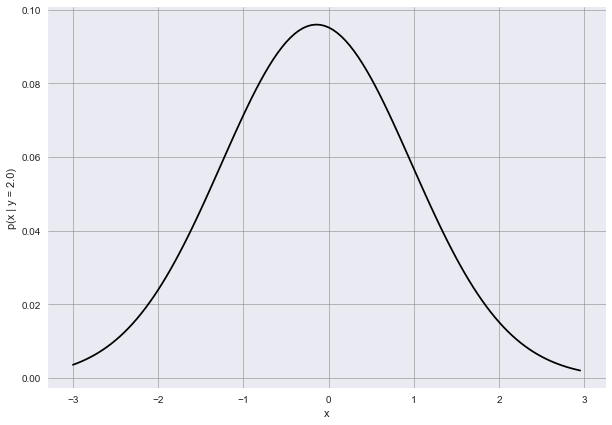

In [22]:
i = 100
yvalue = y[0,i]
print('yvalue {}'.format(yvalue))

plt.plot(y[i,:], jointPdf[:,i], c='black' );
plt.xlabel("x");
plt.ylabel('p(x | y = {})'.format(yvalue));

## Marginal probability distribution

* $p(y) = \sum_x p(x,y)$


* $p(y) = \int_x p(x,y)$


## Parameter estimation
* A particular pdf **is** our ML model

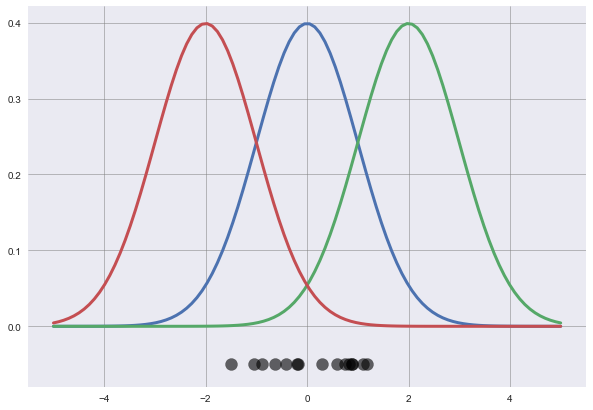

In [23]:
N = 15; 
# rng.seed(9876755)
samples = rng.randn(N)

x = np.linspace(-5, 5, 100)
plt.plot(x, norm.pdf(x), lw=3);
plt.plot(x, norm.pdf(x-2), lw=3);
plt.plot(x, norm.pdf(x+2), lw=3);
plt.scatter( samples, -0.05*np.ones(N), c='k', alpha=0.6);

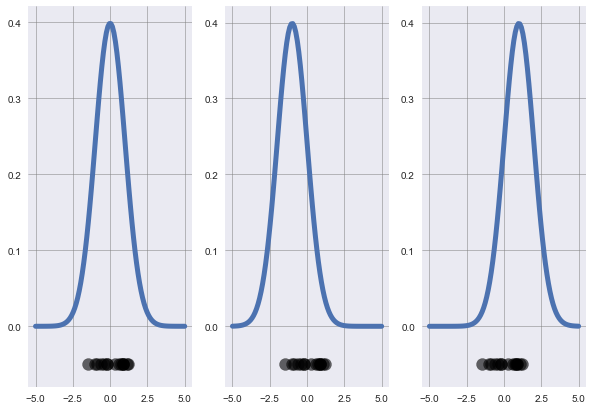

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].plot(x, norm.pdf(x), lw=5); axes[0].scatter( samples, -0.05*np.ones(N), c='k', alpha=0.6)
axes[1].plot(x, norm.pdf(x+1), lw=5); axes[1].scatter( samples, -0.05*np.ones(N), c='k', alpha=0.6)
axes[2].plot(x, norm.pdf(x-1), lw=5); axes[2].scatter( samples, -0.05*np.ones(N), c='k', alpha=0.6)

## Intuition -> math -> stats

\begin{equation*}
    \sum_i (x_i - \mu)^2
\end{equation*}


do nothing:

\begin{equation*}
     = \ln \exp   \Big[ \sum_i (x_i - \mu)^2 \Big]
\end{equation*}

property of exp (**also minus sign operation to get Gaussian distribution**):

\begin{equation*}
     = \ln \bigg( \exp -(x_1 - \mu)^2 \, \exp -(x_2 - \mu)^2 \, \ldots \, \exp -(x_N - \mu)^2\bigg)
\end{equation*}


product of Gaussians!

\begin{equation*}
     = \ln \bigg( \prod_i p(\, \mu;\, x_i ) \bigg)
\end{equation*}


if the $x_i$ are independent:

\begin{equation*}
     = \ln \bigg(  p(\, \mu;\, x_1, \, x_2, \, \ldots x_N ) \bigg)
\end{equation*}

gives us the **Log-likelihood**

* There is a mistake / sleight-of-hand on this slide.

* Need to *minimize* SSD, but need to *maximize* log-likelihood.
  * I snuck in a negative sign between the second and third lines ("maximize negative cost")

## Maximum likelihood estimation (MLE)
* Find values of the parameters such that the probability of observing your data is high

# Another view of linear regression
As maximum likelhood estimation

\begin{equation*}
p( y \, x; \, \mu ) = \mathcal{N}( \, y; \, \mu = (ax + b) )
\end{equation*}

## Bayes rule (joint distribution to a conditional distribution)

\begin{equation*}
p(y\,|\,x) = \frac{p(x\,|\,y) \,  p(y)}{p(x)}
\end{equation*}


### As a classifier

* $y$ the class to predict
* $x$ the observations and features
* $p(y)$ prior probability of the class
* $p(x|y)$ likelihood
* $p(x)$ the probability of the observations/features.

* Sometimes $p(x)$ is intractible to compute. Other times it's not interesting enough to put modeling effort into, so:

\begin{equation*}
p(y\,|\,x) = \frac{p(x\,|\,y) \,  p(y)}{\int_y p(x \, | \, y) \, p(y)}
\end{equation*}

### Cost functions for classification?

* Number of errors
* (probability of error)

### With many features

\begin{equation*}
p(y | x_1,x_2,\ldots,x_N) = \frac{p(x_1,x_2,\ldots,x_N|y)p(y)}{p(x_1,x_2,\ldots,x_N)}
\end{equation*}

## Naive Bayes classifier

Assume conditional independence

\begin{equation*}
p(y|x_1,x_2,\ldots,x_N) = \frac{p(x_1|y)p(x_2|y)\ldots p(x_N|y)p(y)}{p(x_1)p(x_2)\ldots p(x_N)}
\end{equation*}


In [25]:
data_newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [26]:
categories = [ 'rec.sport.baseball', 'rec.sport.hockey' ]
train_data_news = fetch_20newsgroups(subset='train', categories=categories)
test_data_news = fetch_20newsgroups(subset='test', categories=categories)

In [27]:
print( train_data_news.data[0])
print( 'belongs to class : {}'.format( categories[train_data_news.target[0]] ))

From: dougb@comm.mot.com (Doug Bank)
Subject: Re: Info needed for Cleveland tickets
Reply-To: dougb@ecs.comm.mot.com
Organization: Motorola Land Mobile Products Sector
Distribution: usa
Nntp-Posting-Host: 145.1.146.35
Lines: 17

In article <1993Apr1.234031.4950@leland.Stanford.EDU>, bohnert@leland.Stanford.EDU (matthew bohnert) writes:

|> I'm going to be in Cleveland Thursday, April 15 to Sunday, April 18.
|> Does anybody know if the Tribe will be in town on those dates, and
|> if so, who're they playing and if tickets are available?

The tribe will be in town from April 16 to the 19th.
There are ALWAYS tickets available! (Though they are playing Toronto,
and many Toronto fans make the trip to Cleveland as it is easier to
get tickets in Cleveland than in Toronto.  Either way, I seriously
doubt they will sell out until the end of the season.)

-- 
Doug Bank                       Private Systems Division
dougb@ecs.comm.mot.com          Motorola Communications Sector
dougb@nwu.edu       

In [28]:
c = 1 # hockey
print( train_data_news.data[ np.where(train_data_news.target == c)[0][0]] )

From: gld@cunixb.cc.columbia.edu (Gary L Dare)
Subject: Re: Flames Truly Brutal in Loss
Nntp-Posting-Host: cunixb.cc.columbia.edu
Reply-To: gld@cunixb.cc.columbia.edu (Gary L Dare)
Organization: PhDs In The Hall
Distribution: na
Lines: 13


This game would have been great as part of a double-header on ABC or
ESPN; the league would have been able to push back-to-back wins by
Le Magnifique and The Great One.  Unfortunately, the only network
that would have done that was SCA, seen in few areas and hard to
justify as a pay channel. )-;

gld
--
~~~~~~~~~~~~~~~~~~~~~~~~ Je me souviens ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Gary L. Dare
> gld@columbia.EDU 			GO  Winnipeg Jets  GO!!!
> gld@cunixc.BITNET			Selanne + Domi ==> Stanley



## Bayes example
A document contains the word "Gretzky" but not "Smith", is the document more likely to be about Baseball or Hockey?

### The prior and conditional probabilities:

* $p(g=1 \, | \, \mathrm{B} ) = 0.001$ - rare to see "Gretzky" in a doc about baseball
* $p(s=1 \, | \, \mathrm{B} ) = 0.15$ - common to see "Smith" in a doc about baseball

* $p(g=1 \, |  \, \mathrm{H} ) = 0.1$ - common to see "Gretzky" in a doc about hockey
* $p(s=1 \, |  \, \mathrm{H} ) = 0.05$ - moderately likely to see "Smith" in a doc about hockey


* $p( \mathrm{H} ) = 0.4$
* $p( \mathrm{B} ) = 0.6$

### We want to compute and compare
* $p( B \, |  \, g=1, s=0 )$
* $p( H \, |  \, g=1, s=0 )$

\begin{equation*}
p( \mathrm{H} \, |  \, g=1, s=0 ) = \frac{ p(g=1 \, | \, \mathrm{H})p(s=0 \, | \, \mathrm{H}) p(\mathrm{H})}{p(g=1)p(s=0)}
\end{equation*}

\begin{equation*}
p( \mathrm{B} \, |  \, g=1, s=0 ) = \frac{ p(g=1 \, | \, \mathrm{B})p(s=0 \, | \, \mathrm{B}) p(\mathrm{B})}{p(g=1)p(s=0)}
\end{equation*}

\begin{equation*}
p( \mathrm{H} \, |  \, g=1, s=0 ) \, \propto \, p(g=1 \, | \, \mathrm{H})p(s=0 \, | \, \mathrm{H}) p(\mathrm{H})
\end{equation*}

\begin{equation*}
p( \mathrm{B} \, |  \, g=1, s=0 ) \, \propto \, p(g=1 \, | \, \mathrm{B})p(s=0 \, | \, \mathrm{H}) p(\mathrm{B})
\end{equation*}

\begin{equation*}
p( y = \mathrm{H} \, |  \, g=1, s=0 ) = (0.1)(0.95)(0.4) = 0.038
\end{equation*}

\begin{equation*}
p( y = \mathrm{B} \, |  \, g=1, s=0 ) = (0.001)(0.85)(0.6) = 0.00051
\end{equation*}

"Hockey" is ~75 times more likely than "Baseball" given the evidence.

In [29]:
def printCmtxExample( confusion_matrix ):
    print( '{}  {}  \t\t{}'.format( 'pred baseball ', confusion_mtx.T[0,0], confusion_mtx.T[0,1] )) 
    print( '{}  {}  \t\t{}'.format( 'pred hockey   ', confusion_mtx.T[1,0], confusion_mtx.T[1,1] ))
    print( '{}  {}     {}'.format( '              ', 'baseball', 'hockey ' ) )

### Two classic naive Bayes variants used in text classification
https://en.wikipedia.org/wiki/Naive_Bayes_classifier
* Multi-variate Bernoulli Naive Bayes (BernoulliNB) -- boolean variable if a word appears in a document
* Multinomial naive Bayes (MultinomialNB) -- counts of a word appears in a document
    * regularization for small sample correction (zero sample would cause problem and wipes out other possibilties)


### Term frequency–inverse document frequency

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

* Term frequency $tf(t,d)$ -- number of times term t in document d
* Inverse document frequency $idf(t, D)$ -- the logarithmically scaled inverse fraction of the documents that contain the word.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Build features
# Multinomial Naive Bayes classifier
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit on the training data
nb_model.fit(train_data_news.data, train_data_news.target)

# Evaluate on the test data
pred_labels = nb_model.predict(test_data_news.data)

confusion_mtx = confusion_matrix(test_data_news.target, pred_labels)
printCmtxExample( confusion_mtx )

pred baseball   373  		4
pred hockey     24  		395
                baseball     hockey 


In [31]:
# John making extra sure that the columns (and not rows) encode the true predictions
np.sum(test_data_news.target == 0)

397

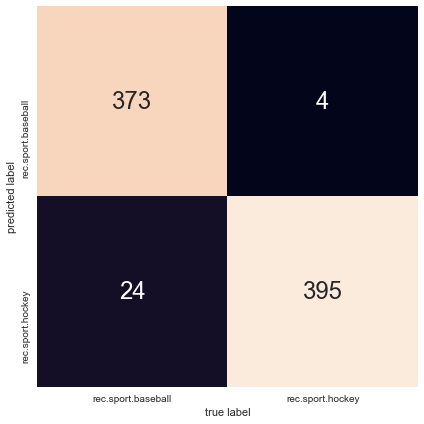

In [32]:
# A decent visualization if you have seaborn installed
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=test_data_news.target_names,
            yticklabels=test_data_news.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Lets see what it looks like when the classifier makes a mistake.

In [33]:
# truly about hockey
hockey = (test_data_news.target == 1) 

# but predicted to be about baseball
pred_baseball = (pred_labels == 0)
err_i = np.where( hockey & pred_baseball )[0]

# Look at one example of a mistake
print( test_data_news.data[err_i[1]] )

From: franjion@spot.Colorado.EDU (John Franjione)
Subject: Re: Where's Roger?
Nntp-Posting-Host: spot.colorado.edu
Organization: University of Colorado, Boulder
Lines: 15

duncan@ (Nicholas Duncan) writes:

>I really feel the need for a knowledgable hockey observer to explain
>this year's playoffs to me. I mean, the obviously superior Toronto team
>with the best center and the best goalie in the league keeps losing.
>What gives?

Unfortunately, Roger is now over at r.s.baseball spewing his expertise
(i.e. being a dickhead).  I guess he is afraid of posting anything
here, because he knows what to expect.
-- 
John Franjione
Department of Chemical Engineering
University of Colorado, Boulder
franjion@spot.colorado.edu



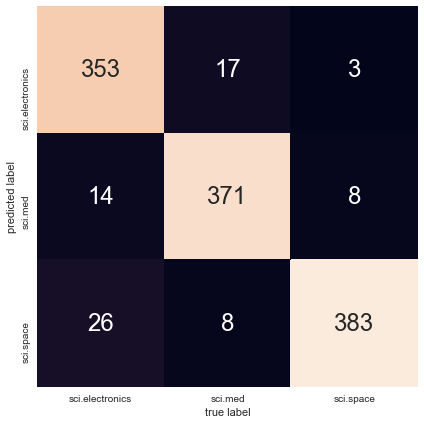

In [34]:
categories = [  'sci.electronics', 'sci.med', 'sci.space', ]
train_data_news = fetch_20newsgroups(subset='train', categories=categories)
test_data_news = fetch_20newsgroups(subset='test', categories=categories)
nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Fit on the training data
nb_model.fit(train_data_news.data, train_data_news.target)
# Evaluate on the test data
pred_labels = nb_model.predict(test_data_news.data)
confusion_mtx = confusion_matrix(test_data_news.target, pred_labels)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=test_data_news.target_names,
            yticklabels=test_data_news.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

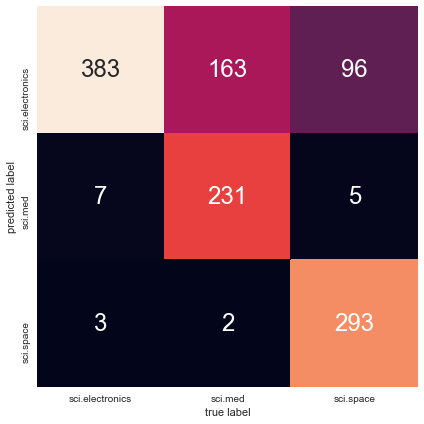

In [35]:
from sklearn.naive_bayes import BernoulliNB
nb_model = make_pipeline(TfidfVectorizer(), BernoulliNB())
# Fit on the training data
nb_model.fit(train_data_news.data, train_data_news.target)
# Evaluate on the test data
pred_labels = nb_model.predict(test_data_news.data)
confusion_mtx = confusion_matrix(test_data_news.target, pred_labels)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=test_data_news.target_names,
            yticklabels=test_data_news.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Preview of next week
Using today's linear regression example

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_model = Pipeline(
    [('poly', PolynomialFeatures(degree=3)), 
     ('linear', LinearRegression())])

# Fit the model and 
poly_model.fit( X_train, y_train )

print( 'Optimal parameters: ')
print( ' '.join('{}'.format(c) for c in poly_model.named_steps['linear'].coef_))
# print( 'R^2 Score: {0:.3f}'.format( poly_model.score(X,y)))

# Run the model for evenly spaced values of x for plotting
Xlin = np.reshape(np.linspace(-0.08,0.04),(-1,1))
y_poly_pred = poly_model.predict( Xlin )

Optimal parameters: 
0.0 3358.133787382553 14264.613124057725 -339775.0563561803


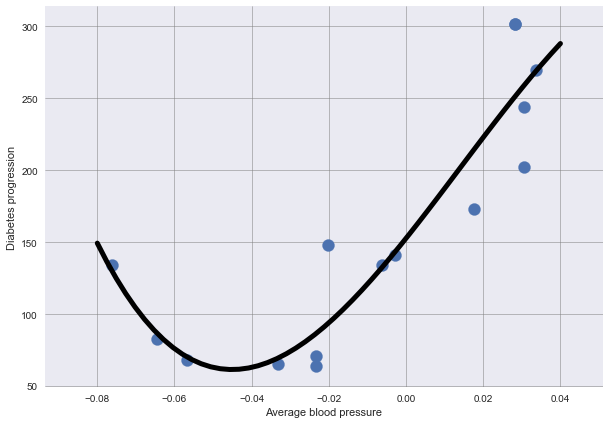

In [37]:
# plot
plt.scatter( X_train, y_train )
plt.plot( Xlin, y_poly_pred, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

## Test

Next, we collected more data from the same study.  Let's see how the model we trained performs on the new data.

R^2 Score: -0.589


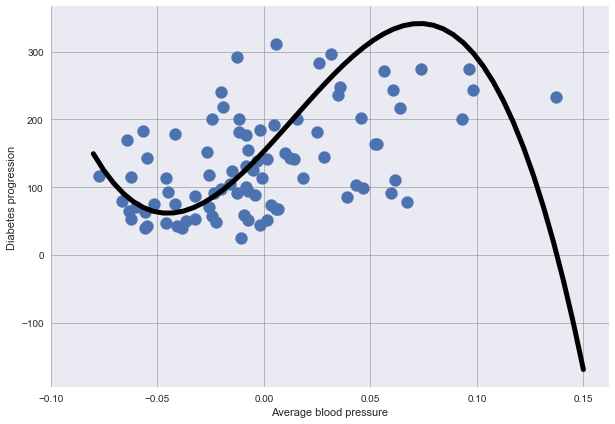

In [38]:
# Evaluate over equally spaced x
Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_poly_pred_test = poly_model.predict( Xlin2 )

print( 'R^2 Score: {0:.3f}'.format( poly_model.score(Xtest,ytest)))

plt.scatter( Xtest, ytest )
plt.plot( Xlin2, y_poly_pred_test, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

R^2 Score: -0.367


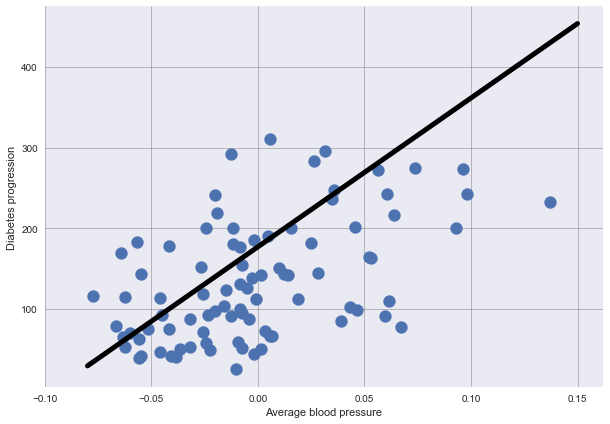

In [39]:
print( 'R^2 Score: {0:.3f}'.format( model.score( Xtest, ytest )))

Xlin2 = np.reshape(np.linspace(-0.08,0.15),(-1,1))
y_pred_test = model.predict( Xlin2 )

plt.scatter( Xtest, ytest )
plt.plot( Xlin2, y_pred_test, color='black', linewidth=5 )
plt.ylabel('Diabetes progression')
plt.xlabel('Average blood pressure');

* **Hyper parameter**
    * Something you can change about your model / optimization that isn't optimized for
    * Often this is optimized for in an "outer loop" using cross validation 


* **Cross validation**
    * The process of testing performance on data independent of those that were used for training

In [40]:
# Set up training, validation, test splits

diabetes_data= datasets.load_diabetes()

N = len(diabetes_data.target)

# Training data (200 samples)
i_train = np.arange(0,200)
X_train_big = diabetes_data.data[i_train,np.newaxis,2]
y_train_big = diabetes_data.target[i_train]

# Validation data (100 samples)
i_validate = np.arange(201,300)
X_validate_big = diabetes_data.data[i_validate,np.newaxis,2]
y_validate_big = diabetes_data.target[i_validate]

# Test data (100 samples)
i_test = np.arange(301,400)
X_test_big = diabetes_data.data[i_test,np.newaxis,2]
y_test_big = diabetes_data.target[i_test]


In [41]:
pmList = []
for deg in range(1,5):
    pm = Pipeline(
        [('poly', PolynomialFeatures(degree=deg)), 
        ('linear', LinearRegression())])

    # Fit the model on the training set
    pm.fit( X_train_big, y_train_big )

    # Evaluate on the validation set
    print( 'degree {0:d} : score: {1:.3f}'.format( deg, pm.score(X_validate_big,y_validate_big)))
    pmList += [pm]

degree 1 : score: 0.385
degree 2 : score: 0.386
degree 3 : score: 0.386
degree 4 : score: 0.372


In [42]:
for pm in pmList:
    print( 'Optimal parameters ')
    print( ' '.join('{}'.format(k) for k in pm.named_steps['linear'].coef_ ))
    print( '' )

Optimal parameters 
0.0 919.2743804969432

Optimal parameters 
0.0 883.1887001595449 2309.7415371507086

Optimal parameters 
0.0 927.0479150291733 2718.1521195809955 -9256.617587387496

Optimal parameters 
0.0 1088.5161318471403 -1509.1348628304554 -56728.37093908152 621065.3205567285

